In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter
import csv

inpdat = '../../../3ormoreDATLOW.csv'
dataMatrix = pd.read_csv('../../../3ormoreDATLOW.csv', index_col=0)
dataMatrix.loc[dataMatrix['class'] == 2.0, 'class'] = -1.0

#drop negative rows
dataMatrix = dataMatrix[dataMatrix["class"] == 1.0]

dataMatrix = dataMatrix.drop(columns=['class'])

len(dataMatrix.columns.values)


17

Text(0.5,68.0938,'\n\nCorrelation Matrix for 17 Features with 3 or More Occurrence in CIMP-High')

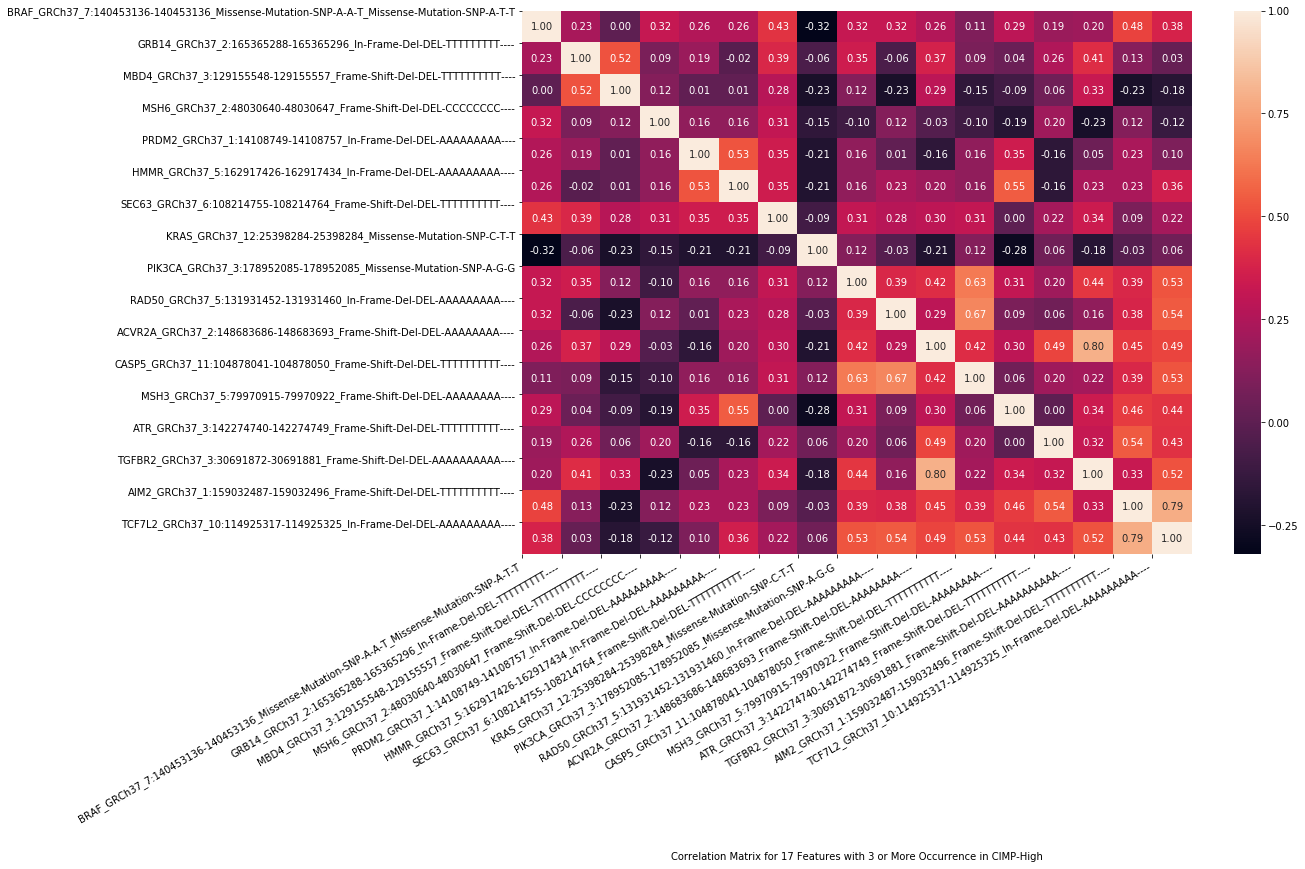

In [2]:
corr = dataMatrix.corr()
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr,annot=True,fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns,rotation=30,ha='right');
plt.yticks(range(len(corr.columns)), corr.columns);
ax.set_xlabel("\n\nCorrelation Matrix for 17 Features with 3 or More Occurrence in CIMP-High")

#plt.matshow(dataMatrix.corr())

In [3]:
scores = {}
for row in list(corr):
    for col in list(corr):
        if(row == col or (col,row) in scores): #dont worry about score if its on the same feat for x and y
            continue
        scores[(row,col)] = corr.at[row,col]

#sort by scores
upright = sorted(scores.items(), key=itemgetter(1), reverse=True)

#make csv
newfilepos = [["feature 1","feature 2","correlation"]]
for x in range(0,len(upright)):
    newrowpos = [upright[x][0][0],upright[x][0][1],upright[x][1]]
    newfilepos.append(newrowpos)

#set correlation cutoff and get 1- and 2-item sets
mincorr = .48
c1 = []
c2 = []
for x in range(0,len(upright)):
    if(upright[x][1] >= mincorr):
        c2.append([upright[x][0][0],upright[x][0][1]])
        c2.append([upright[x][0][1],upright[x][0][0]])
for x in range(0,len(c2)):
    if(c2[x][0] not in c1):
        c1.append(c2[x][0])
    if(c2[x][1] not in c1):
        c1.append(c2[x][1])
print("length of 1-itemsets:",len(c1)," length of 2-itemsets:",len(c2))

#create c3
c3 = []
for x in range(0,len(c2)):
    for y in range(1,len(c1)):
        #make sure no repeat
        if(len(set([c2[x][0],c2[x][1],c1[y]])) == 3):
            iset = ([c2[x][0],c2[x][1]],[c1[y]])
            c3.append(iset)
print("length of 3-itemsets:",len(c3))

#create c4
c4 = []
for x in range(0,len(c3)):
    for y in range(1,len(c1)):
        #make sure no repeat
        if(len(set([c3[x][0][0],c3[x][0][1],c3[x][1][0],c1[y]])) == 4):
            iset = ([c3[x][0][0],c3[x][0][1],c3[x][1][0]],[c1[y]])
            c4.append(iset)

print("length of 4-itemsets:",len(c4))
c4

length of 1-itemsets: 14  length of 2-itemsets: 30
length of 3-itemsets: 336
length of 4-itemsets: 3432


[(['ACVR2A_GRCh37_2:148683686-148683693_Frame-Shift-Del-DEL-AAAAAAAA----',
   'TGFBR2_GRCh37_3:30691872-30691881_Frame-Shift-Del-DEL-AAAAAAAAAA----',
   'AIM2_GRCh37_1:159032487-159032496_Frame-Shift-Del-DEL-TTTTTTTTTT----'],
  ['TCF7L2_GRCh37_10:114925317-114925325_In-Frame-Del-DEL-AAAAAAAAA----']),
 (['ACVR2A_GRCh37_2:148683686-148683693_Frame-Shift-Del-DEL-AAAAAAAA----',
   'TGFBR2_GRCh37_3:30691872-30691881_Frame-Shift-Del-DEL-AAAAAAAAAA----',
   'AIM2_GRCh37_1:159032487-159032496_Frame-Shift-Del-DEL-TTTTTTTTTT----'],
  ['RAD50_GRCh37_5:131931452-131931460_In-Frame-Del-DEL-AAAAAAAAA----']),
 (['ACVR2A_GRCh37_2:148683686-148683693_Frame-Shift-Del-DEL-AAAAAAAA----',
   'TGFBR2_GRCh37_3:30691872-30691881_Frame-Shift-Del-DEL-AAAAAAAAAA----',
   'AIM2_GRCh37_1:159032487-159032496_Frame-Shift-Del-DEL-TTTTTTTTTT----'],
  ['CASP5_GRCh37_11:104878041-104878050_Frame-Shift-Del-DEL-TTTTTTTTTT----']),
 (['ACVR2A_GRCh37_2:148683686-148683693_Frame-Shift-Del-DEL-AAAAAAAA----',
   'TGFBR2_GRCh37_

In [4]:
#load the data set
with open(inpdat,'r') as f:
    it = csv.reader(f)
    listit = list(it)
#filter so dataset is only cimphigh samples
newdata = [listit[0]]
for x in range(1,len(listit)):
    if(float(listit[x][len(listit[0])-1]) == 1.0):
        newdata.append(listit[x])
listit = newdata


scores = {}
numsamps = len(listit)-1
# calculate scores for 2-item
for k in range(0,len(c2)):
    occur1 = 0
    occurboth = 0
    for x in range(1,len(listit)):
        if(float(listit[x][listit[0].index(c2[k][0])]) == 1.0 and float(listit[x][listit[0].index(c2[k][1])]) == 1.0):
            occurboth += 1
        if(float(listit[x][listit[0].index(c2[k][0])]) == 1.0):
            occur1 += 1
    if(occurboth < 3):
        continue
    support = occurboth/numsamps
    confidence = occurboth/occur1
    scores[c2[k][0],c2[k][1]] = (support,confidence,support*confidence,occurboth)
# calculate scores for 3-item
for k in range(0,len(c3)):
    occur1 = 0
    occurboth = 0
    for x in range(1,len(listit)):
        if(float(listit[x][listit[0].index(c3[k][0][0])]) == 1.0 and float(listit[x][listit[0].index(c3[k][0][1])]) == 1.0 and float(listit[x][listit[0].index(c3[k][1][0])]) == 1.0):
            occurboth += 1
        if(float(listit[x][listit[0].index(c3[k][0][0])]) == 1.0 and float(listit[x][listit[0].index(c3[k][0][1])]) == 1.0):
            occur1 += 1
    if(occurboth < 3):
        continue
    support = occurboth/numsamps
    confidence = occurboth/occur1
    scores[c3[k][0][0],c3[k][0][1],c3[k][1][0]] = (support,confidence,support*confidence,occurboth)
# calculate scores for 4-item
for k in range(0,len(c4)):
    occur1 = 0
    occurboth = 0
    for x in range(1,len(listit)):
        if(float(listit[x][listit[0].index(c4[k][0][0])]) == 1.0 and float(listit[x][listit[0].index(c4[k][0][1])]) == 1.0 and float(listit[x][listit[0].index(c4[k][0][2])]) == 1.0 and float(listit[x][listit[0].index(c4[k][1][0])]) == 1.0):
            occurboth += 1
        if(float(listit[x][listit[0].index(c4[k][0][0])]) == 1.0 and float(listit[x][listit[0].index(c4[k][0][1])]) == 1.0 and float(listit[x][listit[0].index(c4[k][0][2])]) == 1.0):
            occur1 += 1
    if(occurboth < 3):
        continue
    support = occurboth/numsamps
    confidence = occurboth/occur1
    scores[c4[k][0][0],c4[k][0][1],c4[k][0][2],c4[k][1][0]] = (support,confidence,support*confidence,occurboth)

#sort by scores
scores = sorted(scores.items(), key=itemgetter(1), reverse=True)
scores

[(('TGFBR2_GRCh37_3:30691872-30691881_Frame-Shift-Del-DEL-AAAAAAAAAA----',
   'ACVR2A_GRCh37_2:148683686-148683693_Frame-Shift-Del-DEL-AAAAAAAA----'),
  (0.3125, 0.9090909090909091, 0.28409090909090906, 10)),
 (('ACVR2A_GRCh37_2:148683686-148683693_Frame-Shift-Del-DEL-AAAAAAAA----',
   'TGFBR2_GRCh37_3:30691872-30691881_Frame-Shift-Del-DEL-AAAAAAAAAA----'),
  (0.3125, 0.8333333333333334, 0.2604166666666667, 10)),
 (('ACVR2A_GRCh37_2:148683686-148683693_Frame-Shift-Del-DEL-AAAAAAAA----',
   'TGFBR2_GRCh37_3:30691872-30691881_Frame-Shift-Del-DEL-AAAAAAAAAA----',
   'BRAF_GRCh37_7:140453136-140453136_Missense-Mutation-SNP-A-A-T_Missense-Mutation-SNP-A-T-T'),
  (0.21875, 0.7, 0.15312499999999998, 7)),
 (('TGFBR2_GRCh37_3:30691872-30691881_Frame-Shift-Del-DEL-AAAAAAAAAA----',
   'ACVR2A_GRCh37_2:148683686-148683693_Frame-Shift-Del-DEL-AAAAAAAA----',
   'BRAF_GRCh37_7:140453136-140453136_Missense-Mutation-SNP-A-A-T_Missense-Mutation-SNP-A-T-T'),
  (0.21875, 0.7, 0.15312499999999998, 7)),
 ((

In [5]:
#export results
results = [["if this mutation occurs","then this mutation occurs","support","confidence","s*c","count"]]
for rule in scores:
    str2 = ''
    str1 = rule[0][0]
    if(len(rule[0]) == 3):
        str1 += " and "
        str1 += rule[0][1]
        str2 = rule[0][2]
    elif(len(rule[0]) == 4):
        str1 += " and "
        str1 += rule[0][1]
        str1 += " and "
        str1 += rule[0][2]
        str2 = rule[0][3]
    else:
        str2 = rule[0][1]
    results.append([str1,str2,rule[1][0],rule[1][1],rule[1][2],rule[1][3]])
    
with open("./rules.csv","w") as fun:
    writer = csv.writer(fun)
    writer.writerows(results)
    
results

[['if this mutation occurs',
  'then this mutation occurs',
  'support',
  'confidence',
  's*c',
  'count'],
 ['TGFBR2_GRCh37_3:30691872-30691881_Frame-Shift-Del-DEL-AAAAAAAAAA----',
  'ACVR2A_GRCh37_2:148683686-148683693_Frame-Shift-Del-DEL-AAAAAAAA----',
  0.3125,
  0.9090909090909091,
  0.28409090909090906,
  10],
 ['ACVR2A_GRCh37_2:148683686-148683693_Frame-Shift-Del-DEL-AAAAAAAA----',
  'TGFBR2_GRCh37_3:30691872-30691881_Frame-Shift-Del-DEL-AAAAAAAAAA----',
  0.3125,
  0.8333333333333334,
  0.2604166666666667,
  10],
 ['ACVR2A_GRCh37_2:148683686-148683693_Frame-Shift-Del-DEL-AAAAAAAA---- and TGFBR2_GRCh37_3:30691872-30691881_Frame-Shift-Del-DEL-AAAAAAAAAA----',
  'BRAF_GRCh37_7:140453136-140453136_Missense-Mutation-SNP-A-A-T_Missense-Mutation-SNP-A-T-T',
  0.21875,
  0.7,
  0.15312499999999998,
  7],
 ['TGFBR2_GRCh37_3:30691872-30691881_Frame-Shift-Del-DEL-AAAAAAAAAA---- and ACVR2A_GRCh37_2:148683686-148683693_Frame-Shift-Del-DEL-AAAAAAAA----',
  'BRAF_GRCh37_7:140453136-14045313

In [6]:
len(results)

267